# First Name:Yanqing
# Last Name: Zhong

# Import Libraries  

In [12]:
import pandas as pd
import numpy as np
import scipy.stats  
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [13]:
bottle=pd.read_csv('bottle.csv',low_memory=False)
pd.set_option('display.float_format',lambda x:'%f'%x)
print(len(bottle)) #number of rows (observations)

864863


# Data management 

In [14]:
# Convert variable to numeric
bottle['Depthm']=pd.to_numeric(bottle['Depthm'],errors='coerce') 
bottle['R_PRES']=pd.to_numeric(bottle['R_PRES'],errors='coerce')
bottle['O2ml_L']=pd.to_numeric(bottle['O2ml_L'],errors='coerce')

In [15]:
# Convert Quality code variable to numeric
bottle['P_qual']=pd.to_numeric(bottle['P_qual'],errors='coerce')
bottle['O_qual']=pd.to_numeric(bottle['O_qual'],errors='coerce') 

In [16]:
# Replace null values
bottle['P_qual'].replace('null', np.nan, inplace=True)
bottle['O_qual'].replace('null', np.nan, inplace=True)

# Create a subset

### Depth from 50-150, selecting only Oxygen, and Pressure data 
### both from  OK Date and data taken from a CTD device

In [17]:
sub1 = bottle[(bottle['Depthm'] > 50) & 
              (bottle['Depthm'] <= 150) & 
              ((bottle['O_qual'].isnull()) | (bottle['O_qual'] == 6))&
              ((bottle['P_qual'].isnull()) | (bottle['P_qual'] == 6))]

In [18]:
sub2=sub1.copy()
print(len(sub2))

58533


# Chart/Plot

In [19]:
# Generate the pressure categories from pressure numerica variable
sub2['PRES_Category'] = pd.cut(sub2.R_PRES, [50, 70, 90, 110,130,150],
                                labels=['low', 'medium-low','medium ', 'medium-high ', 'high '])

sub2['PRES_Category']=sub2['PRES_Category'].astype('category')

# Create a new variable（Oxygen_level）

### Oxygen_level that categorizes the Oxygen numeric variable（O2ml_L） 
### into two categories: high(1) and low(0）

In [20]:
def Oxygen_level (row):
    if row['O2ml_L']>=4.75 : # high oxygen level return 1
        return 1
    elif row['O2ml_L'] < 4.75 : # low oxygen level return 0
        return 0

sub2['Oxygen_level']=sub2.apply(lambda row:Oxygen_level (row),axis=1)

c1=sub2.groupby('Oxygen_level').size()
print(c1)

Oxygen_level
0    31717
1    26816
dtype: int64


# Contingency table of observed counts 

### between Oxygen concentration level (Oxygen_level) and Pressure categories (PRES_Category)

In [21]:
ct1=pd.crosstab(sub2['Oxygen_level'],sub2['PRES_Category'])
print(ct1)

PRES_Category   low  medium-low  medium   medium-high   high 
Oxygen_level                                                 
0              5502        6102     5587          7039   6088
1              9975        7801     4676          3183   1059


# Contingency table of observed percentages 

### between Oxygen concentration level (Oxygen_level) and Pressure categories (PRES_Category)

In [22]:
colsum=ct1.sum(axis=0)
clopct=ct1/colsum
print(clopct)

PRES_Category      low  medium-low  medium   medium-high     high 
Oxygen_level                                                      
0             0.355495    0.438898 0.544383      0.688613 0.851826
1             0.644505    0.561102 0.455617      0.311387 0.148174


# Chi-square analysis 

### between Oxygen concentration level (Oxygen_level) and Pressure categories (PRES_Category)

In [23]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(6369.852645882526, 0.0, 4, array([[8230.40212587, 7393.3760261 , 5457.68669754, 5435.88360345,
        3800.65154704],
       [7246.59787413, 6509.6239739 , 4805.31330246, 4786.11639655,
        3346.34845296]]))


# Bar plot to show relationship 

### between Oxygen concentration level (Oxygen_level) and Pressure categories (PRES_Category)

Text(9.444444444444445, 0.5, 'Proportion high oxygen concentration level')

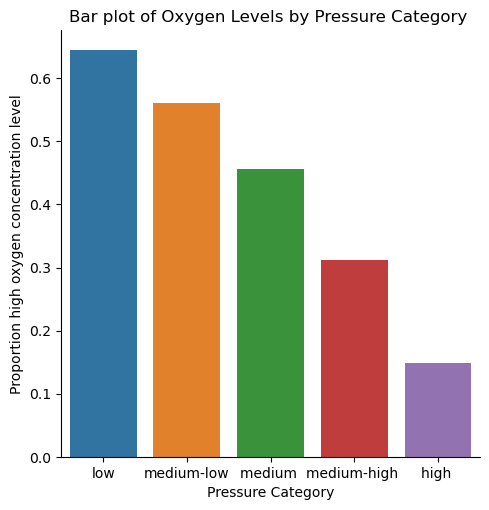

In [24]:
%matplotlib inline
sns.catplot(x="PRES_Category", y="Oxygen_level", data=sub2, kind="bar", ci=None)
plt.title('Bar plot of Oxygen Levels by Pressure Category ')
plt.xlabel('Pressure Category')
plt.ylabel('Proportion high oxygen concentration level') # 1 is high level, 0 is low level

# Post-hoc analysis

In [25]:
sub3=sub2.copy()
cat=['low', 'medium-low','medium ', 'medium-high ', 'high ']

for x in range(0,len(cat)-1):
    for y in range(x+1,len(cat)):
        recode = { cat[x]:cat[x], cat[y]:cat[y]}
        sub3['temp'] = sub3['PRES_Category'].map(recode)
        cont=pd.crosstab(sub3['Oxygen_level'], sub3['temp'])
        cs= scipy.stats.chi2_contingency(cont)
        print("\n", cat[x], " versus ", cat[y],
              "Chi value: ", cs[0], "\t\tp value: ", cs[1])



 low  versus  medium-low Chi value:  212.8411608001619 		p value:  3.296282235016448e-48

 low  versus  medium  Chi value:  897.105860743646 		p value:  4.1780434105978054e-197

 low  versus  medium-high  Chi value:  2732.750888972702 		p value:  0.0

 low  versus  high  Chi value:  4818.665905769131 		p value:  0.0

 medium-low  versus  medium  Chi value:  262.65222444179597 		p value:  4.533207585776557e-59

 medium-low  versus  medium-high  Chi value:  1480.1842353985678 		p value:  0.0

 medium-low  versus  high  Chi value:  3300.4451168188507 		p value:  0.0

 medium   versus  medium-high  Chi value:  449.92125619916993 		p value:  7.503301788309497e-100

 medium   versus  high  Chi value:  1801.3620925680425 		p value:  0.0

 medium-high   versus  high  Chi value:  606.1438998644234 		p value:  7.717260507540945e-134
